In [7]:
from scNAT.main import DeepTCR_U
import scanpy as sc

In [4]:
# Data loading
DTCRU = DeepTCR_U('tutorial', max_length=50)

# The TCR data need to contain cell barcode and CDR3, V gene, and J gene information for both chains, each in a 
# separate column
# The RNA data should have the same cell barcode and order as the TCR data, and each column represents a gene
# For example, alpha chain CDR3 is in column 29, V gene in column 23, J gene in column 25, beta chain CDR3 in 
# column 12, V gene in column 6, J gene in column 8
DTCRU.Get_Data(directory='/dir/to/tcr/file/', file_rna = '/dir/to/rna/file/rna.csv', aggregate_by_aa=False, 
               aa_column_alpha = 29, v_alpha_column=23, j_alpha_column=25,aa_column_beta=12,
               v_beta_column=6, j_beta_column=8, sep = ',') 

Loading Data...
Embedding Sequences...
Read in scRNA-seq data...
Data Loaded


In [5]:
# Run scNAT
DTCRU.Train_VAE(batch_size = 32, epochs_min=5, latent_alpha = 1e-06, gene_alpha = 1e-05, seq_alpha = 1e-04)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch = 0, Iteration = 0 Total Loss: 3.02658: Recon Loss: 3.02640: CDR3 Loss: 0.00018: Gene Loss: 0.00015: RNA Loss: 3.02606: Latent Loss: 0.00018: Recon Accuracy: 0.03749
Epoch = 0, Iteration = 1 Total Loss: 2.38186: Recon Loss: 2.38114: CDR3 Loss: 0.00018: Gene Loss: 0.00016

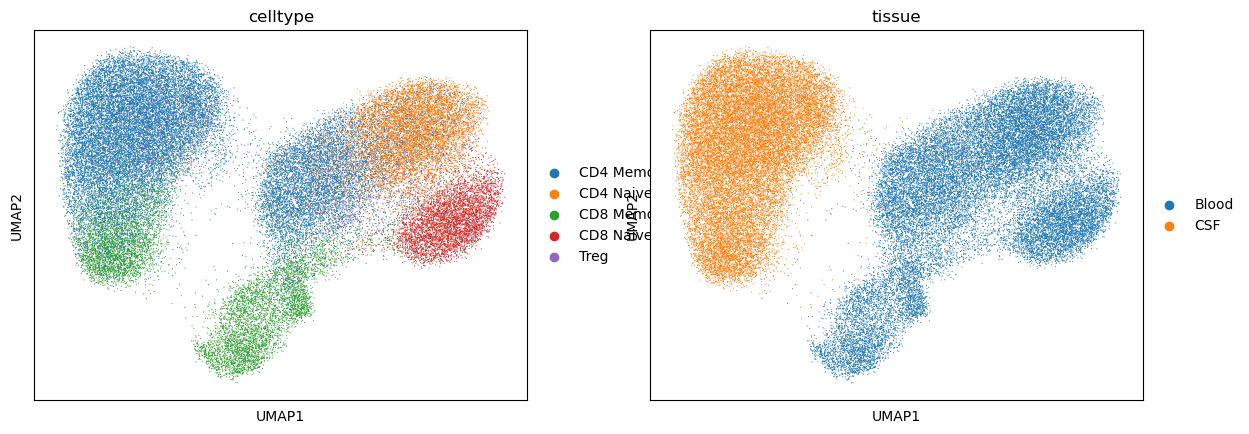

In [8]:
# Load the corresponding adata object
adata = sc.read_h5ad('/gpfs/gibbs/pi/zhao/bz234/data/TCR/ASAP/adata_sub/concat_MS_ResPAN.h5ad')
adata = adata[DTCRU.barcode,:]
adata.obsm['z_vae'] = DTCRU.features
adata.obsm['X_pca'] = adata.obsm['z_vae'].copy()
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
adata.obsm['integ_umap'] = adata.obsm['X_umap'].copy()

# Visualize the integrated UMAP colored by cell type or tissue
sc.pl.umap(adata, color = ['celltype', 'tissue'])